In [1]:
using PyPlot,JLD

In [32]:
KTilde=readdlm("KTilde_Suave_r-1.0-4095.dat");
K=readdlm("K_Suave_r-1.0-4095.dat");
testLFP=readdlm("ejemploLFPestcon5_139.dat")
size(K)

(4095,4095)

In [39]:
testLFP=readdlm("ejemploLFPestcon5_149.dat")

64x64 Array{Float64,2}:
 4125.0       -8.05664  -19.4702    …   -5.37109     -2.01416    -7.38525 
  -17.4561    -1.34277   -8.72803      -11.4136      -2.68555     3.35693 
   -5.37109    6.04248  -10.0708        -7.38525     12.085      -4.69971 
   -8.72803  -18.7988   -18.1274         8.05664    -26.8555      4.02832 
  -11.4136     3.35693  -15.4419         9.39941    -10.7422      0.671387
   -3.35693   -1.34277   -4.02832   …   10.7422       6.04248     8.72803 
   -8.72803   -2.68555    9.39941      -24.1699       4.02832    -9.39941 
  -13.4277     5.37109   -0.671387       8.05664     -1.34277     4.69971 
   -8.05664  -18.7988    -4.69971        8.72803     -2.68555    -1.34277 
   -7.38525    1.34277   -4.69971        0.0         -4.69971    -2.01416 
  -22.8271   -12.085      1.34277   …    9.39941  -4122.99        1.34277 
   -9.39941    1.34277    2.68555       20.1416     -10.0708      0.671387
  -13.4277   -10.0708   -15.4419        14.0991       3.35693    25.5127  
 

In [68]:
extrema(punk)

(1.7716752113369612e6,1.2746641551141575e7)

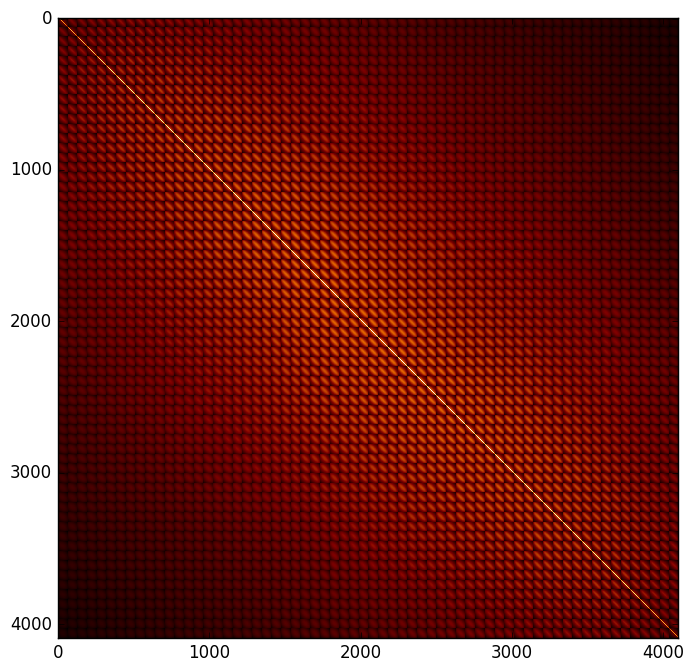

In [5]:
figure(figsize=(8,8))
tuabuel=imshow(K,interpolation="nearest", cmap="afmhot")
savefig("KSuave-r-1-4096.png",dpi=90)

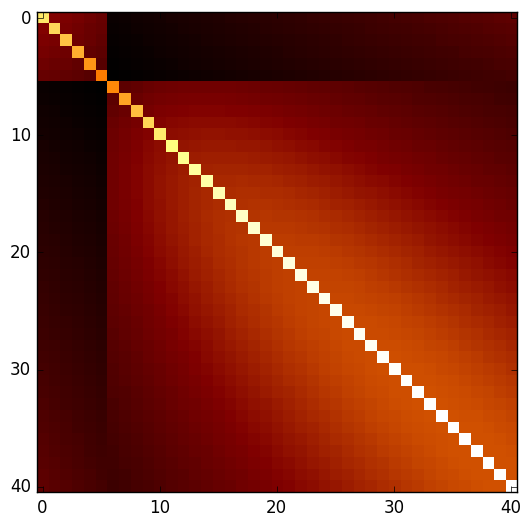

PyObject <matplotlib.image.AxesImage object at 0x7fb084af3ef0>

In [6]:
tuabuel=imshow(K[250:290,250:290],interpolation="nearest", cmap="afmhot")

In [7]:
Kinverso=inv(K);

In [31]:
hola=K[1:24,1:24]
helo=K[25:48,25:48]
helo-hola

24x24 Array{Float64,2}:
 8841.85   4821.05   5025.11   5064.74  …   2293.55   2125.03  1945.02
 4821.05  10577.4    5555.86   5634.97      2501.13   2318.72  2125.03
 5025.11   5555.86  11820.1    6070.54      2697.63   2501.13  2293.55
 5064.74   5634.97   6070.54  12670.5       2884.17   2673.3   2451.5 
 5002.55   5582.11   6070.67   6429.45      3065.88   2840.09  2603.5 
 4881.95   5448.91   5957.12   6378.57  …   3246.31   3004.86  2752.68
 4729.09   5272.05   5775.78   6224.51      3428.1    3170.02  2901.3 
 4559.45   5073.52   5559.8    6010.19      3613.24   3337.46  3051.04
 4382.37   4866.04   5328.79   5766.75      3803.37   3508.63  3203.22
 4203.49   4657.04   5093.86   5512.47      3999.77   3684.71  3358.85
 4026.21   4450.82   4861.25   5257.43  …   4203.41   3866.59  3518.67
 3852.45   4249.71   4634.38   5007.15      4414.9    4054.86  3683.16
 3683.16   4054.86   4414.9    4764.44      4634.38   4249.71  3852.45
 3518.67   3866.59   4203.41   4530.5       4861.25  

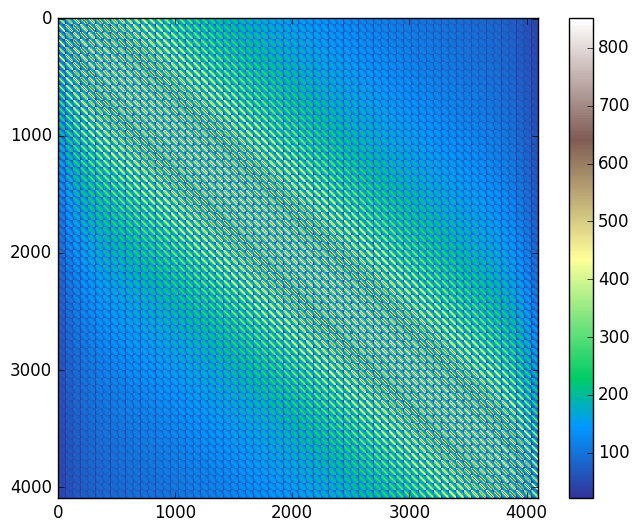

In [45]:
tuabuel=imshow((KTilde),interpolation="nearest", cmap="terrain")
colorbar(tuabuel)
savefig("KTildeSuave-r-1-4096.png",dpi=90)

In [10]:
KTTKInv=transpose(KTilde)*Kinverso;

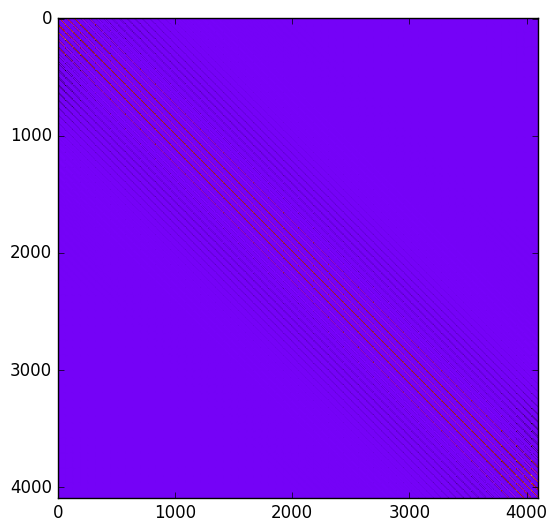

PyObject <matplotlib.image.AxesImage object at 0x7fb0808ac7f0>

In [12]:
tuabuel=imshow(KTTKInv,interpolation="nearest", cmap="gnuplot")
#savefig("KTTInversa01.png",dpi=90)

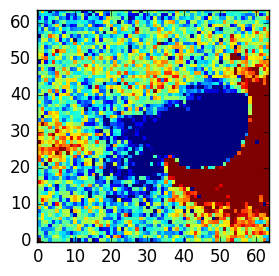

PyObject <matplotlib.image.AxesImage object at 0x7fb0807f45c0>

In [14]:
figure(figsize=(3,3))
limite=25
tallala=imshow(testLFP,origin="lower", interpolation="nearest", vmin=-25,vmax=25)

In [40]:
testLFPvector1=reshape(transpose(testLFP),4096);

In [41]:
tlfpred=testLFPvector1[2:end];

In [42]:
CSDtentativa=zeros(4096)
CSDtentativa[2:end]=transpose(KTTKInv)*tlfpred

4095-element Array{Float64,1}:
  0.105141 
  0.0358169
 -0.056971 
 -0.170027 
 -0.296512 
 -0.425053 
 -0.537527 
 -0.609847 
 -0.612968 
 -0.618773 
 -0.513782 
 -0.448394 
 -0.305222 
  ⋮        
  0.187695 
  0.195315 
  0.204733 
  0.215517 
  0.227099 
  0.23976  
  0.252449 
  0.264736 
  0.278568 
  0.29248  
  0.306072 
  0.317697 

In [43]:
CSDtentativa
CSD=reshape(CSDtentativa,64,64)

64x64 Array{Float64,2}:
  0.0         0.192619     0.221004   …  0.1137     0.128478   0.139581 
  0.105141    0.151116     0.186484      0.103364   0.120027   0.132223 
  0.0358169   0.0884811    0.132796      0.0886822  0.106729   0.121126 
 -0.056971    0.00326793   0.0586683     0.0723061  0.0917072  0.107575 
 -0.170027   -0.101803    -0.033396      0.0559724  0.0752806  0.0912891
 -0.296512   -0.220715    -0.137827   …  0.0410074  0.0605284  0.0768674
 -0.425053   -0.342652    -0.244468      0.0285406  0.0478037  0.0640913
 -0.537527   -0.452437    -0.342362      0.0189023  0.0377446  0.0541936
 -0.609847   -0.529971    -0.415496      0.0131558  0.030965   0.0472036
 -0.612968   -0.563348    -0.45087       0.0104004  0.0271885  0.0427126
 -0.618773   -0.550611    -0.439609   …  0.010083   0.0258283  0.0404573
 -0.513782   -0.482718    -0.378255      0.0118446  0.0260864  0.040388 
 -0.448394   -0.378025    -0.27339       0.0157699  0.028815   0.0414015
  ⋮                        

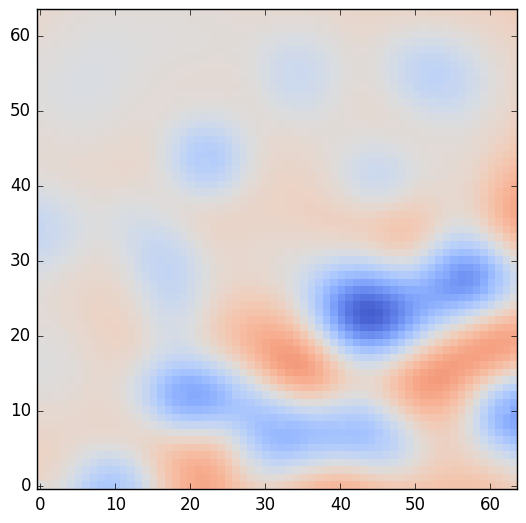

In [44]:
imshow(transpose(CSD), cmap="coolwarm",
origin="lower", interpolation="nearest",
vmin=-2,vmax=2)
savefig("kCSD_est_con5_0149.png",dpi=90)

In [59]:
CSDOldie=readdlm("CSD01.dat");



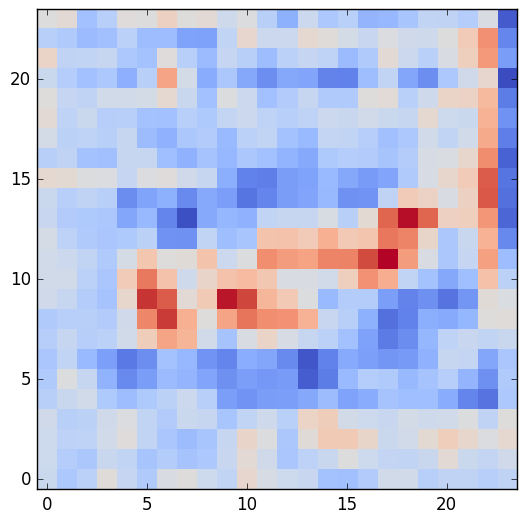

PyObject <matplotlib.image.AxesImage object at 0x7f536581fb70>

In [64]:
imshow((CSDOldie), cmap="coolwarm",
origin="lower", interpolation="nearest")
 #vmin=-1,vmax=1)

In [ ]:
radio=2
xtheta=radio*cos(0:0.05:2*pi)
ytheta=radio*sin(0:0.05:2*pi);

In [ ]:
ion() 
t=91
figure(figsize=(3.5,3.5))
xlim(24,47)
ylim(6,29)
imshow(transpose(CSD[:,:,t]), interpolation="none", cmap="coolwarm", extent=[24,47,6,29],
    origin="lower",vmin=-40,vmax=40)
plot(xtheta+30,ytheta+15, c="black", lw=2)

#savefig("ksuaveCSDRadioModeloR5_$t.png",dpi=90)

In [49]:
lala=readdlm("KTilde3R7.dat")
ruabuelita=(KTilde-lala)
extrema(ruabuelita)

(-4042.2259303749634,4042.551383680093)

In [53]:
lulu=readdlm("K3R7.dat");
tuabuelo=(lulu-K)
extrema(tuabuelo)

(897384.8878797349,9.694680760991693e6)

In [95]:
lalala=readdlm("BtildeDuraCero_radio_5.0.dat")

127x127 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

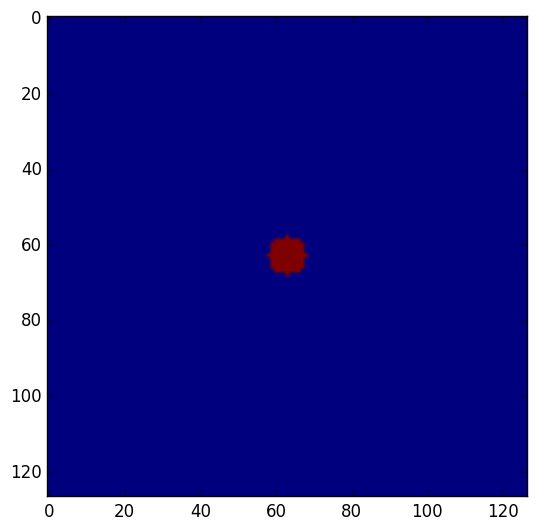

PyObject <matplotlib.image.AxesImage object at 0x7f163b1e2c88>

In [96]:
imshow(lalala)

In [97]:
lelo=readdlm("../../Downloads/BtildeDuraCero.dat")

127x127 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

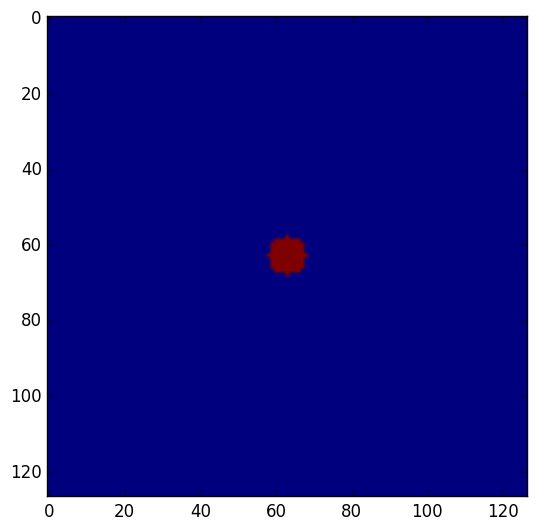

PyObject <matplotlib.image.AxesImage object at 0x7f163b1c4da0>

In [98]:
imshow(lelo)

In [99]:
lula=lalala-lelo
#lula[64,64]=0

127x127 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

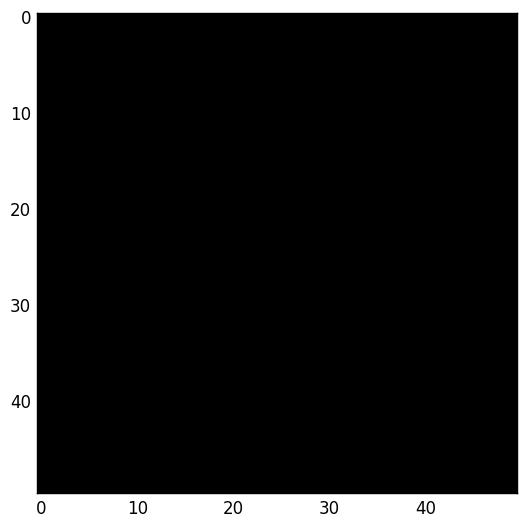

PyObject <matplotlib.image.AxesImage object at 0x7f163b12bba8>

In [100]:
imshow(lula[40:89,40:89],cmap="gnuplot2")
#savefig("JuatTHeFuck01.png",dpi=90)

In [89]:
extrema(lula)

(-0.00011347158893215692,0.009819325239135424)